# PID Controller, simple implementation in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Store parameters in a class

In [17]:
class Parameters():
    def __init__(self):
        self.Ks = 0.79      # g/L
        self.Ko = 0.001     # g/L
        self.Yxs = 0.0857   # g/L
        self.Yso = 0.2266   # gO2/gGlucose
        self.alpha = 5.59   # g/g
        self.Osat = 0.008   # g/L
        self.kla = 400      # 1/h
        self.mu_max = 2.16  # 1/h
        self.Sf = 10        # g/L feed substrate conc. 

        self.x0 = 0.025     # g/L
        self.s0 = 70        # g/L
        self.p0 = 0         # g/L
        self.o0 = 0         # g/L
        self.V0 = 1         # L  Initial volume

        self.t_end = 8      # h
        
par = Parameters()

Define the systems (Batch, Fedbatch)

In [38]:
def batch(x, t, par):
    # F_in = u
    x, s, p, o = x
    
    mu = par.mu_max * (s/(par.Ks+s)) * (o/(par.Ko+o))
    dxdt = mu * x
    dsdt = -dxdt / par.Yxs
    dpdt = par.alpha * dxdt
    dodt = (par.kla*(par.Osat-o)) - (par.Yso* dsdt)
    return [dxdt, dsdt, dpdt, dodt]


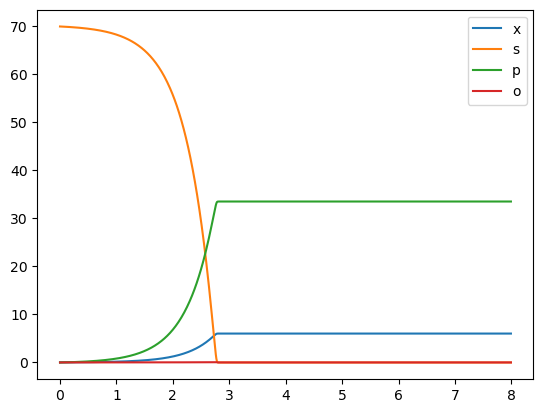

In [39]:
ini = [par.x0, par.s0, par.p0, par.o0]
time = np.arange(0,par.t_end, 0.01)
sol = odeint(batch, y0 = ini, args=(par,), t=time)
plt.plot(time, sol)
plt.legend(['x','s','p','o'])

In [40]:
def fedbatch(x, t, par, u):
    x, s, p, o, V = x

    mu = par.mu_max * (s/(par.Ks+s)) * (o/(par.Ko+o))

    dxdt = -u * x/V + mu*x
    dsdt = u*(par.Sf-s)/V - (mu*x)/par.Yxs
    dpdt = -u*p/V + par.alpha*mu*x
    dodt = (par.kla*(par.Osat-o)) - u*o/V + (par.Yso * dsdt)
    dVdt = u
    return [dxdt, dsdt, dpdt, dodt, dVdt]
    

Text(0.5, 0, 'Time [h]')

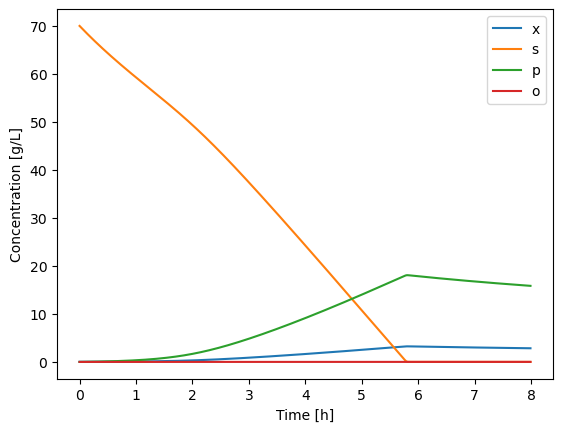

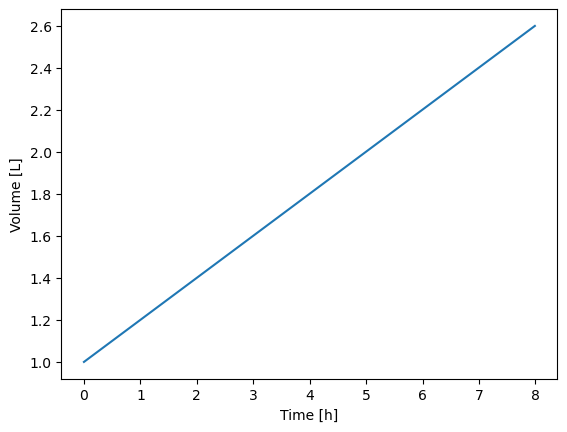

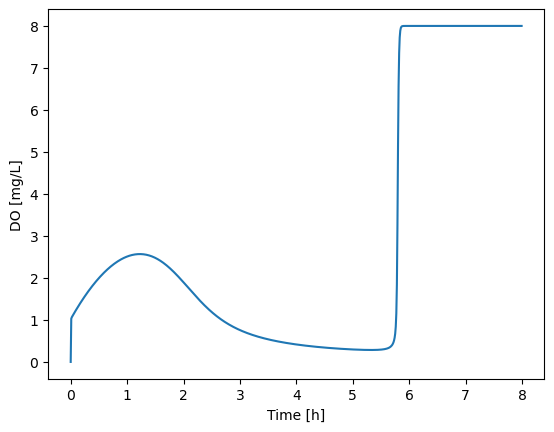

In [41]:
ini = [par.x0, par.s0, par.p0, par.o0, par.V0]
time = np.arange(0,par.t_end, 0.01)
u = 0.2
sol = odeint(fedbatch, y0 = ini, args=(par,u), t=time)
plt.plot(time, sol[:,0:4])
plt.legend(['x','s','p','o'])
plt.ylabel('Concentration [g/L]')
plt.xlabel('Time [h]')
plt.figure()
plt.plot(time, sol[:,4])
plt.ylabel('Volume [L]')
plt.xlabel('Time [h]')
plt.figure()
plt.plot(time, sol[:,3]*1000)
plt.ylabel('DO [mg/L]')
plt.xlabel('Time [h]')


Run the timeloop

In [44]:
# Initialize the controller
time = np.arange(0,par.t_end, 0.01)

e = np.zeros(len(time))   # error
SP = np.zeros(len(time))     # set point
PV = np.zeros(len(time))  # process variable

SP[:] = 0.001


In [47]:

for i in range(len(time)-1):
    dt = time[i+1]-time[i]
    e[i] = SP[i] - PV[i]
    if i >= 1:
        

IndentationError: expected an indented block (681586171.py, line 5)